In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import joblib


In [3]:
df = pd.read_csv("Temp_dataset.csv")

In [37]:
df.head()

,Hour,Minutes,Temperature,Humidity,Feels_like
0,17,44,22.3,67,22.33
1,17,49,22.2,68,22.25
2,17,54,22.0,70,22.08
3,17,59,22.1,70,22.19
4,18,4,22.0,71,22.11


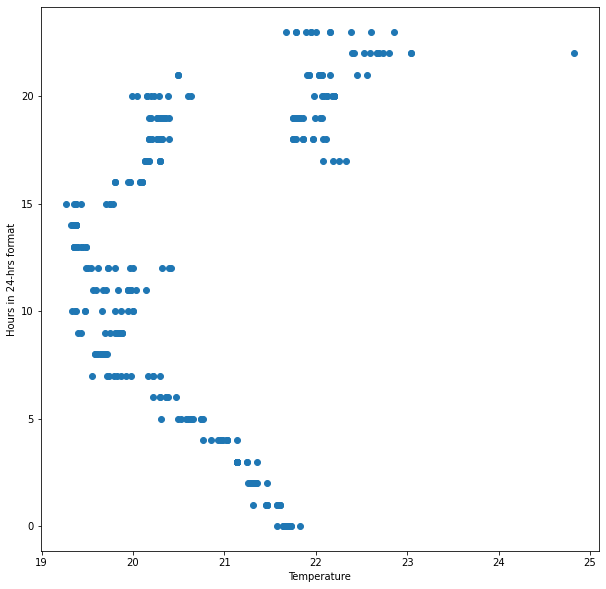

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(df["Feels_like"],df['Hour'])
plt.xlabel("Temperature")
plt.ylabel("Hours in 24-hrs format")
plt.show()

In [39]:
y = df['Feels_like'].apply(lambda x : int(x))
y

0      22
1      22
2      22
3      22
4      22
       ..
313    20
314    20
315    20
316    20
317    20
Name: Feels_like, Length: 318, dtype: int64

In [40]:
x =df[['Hour']]
x

,Hour
0,17
1,17
2,17
3,17
4,18
...,...
313,20
314,20
315,21
316,21


In [41]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test =train_test_split(x,y , train_size=0.1)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy' , splitter= 'best')

In [43]:
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_pred, y_test).round(2)*100 ,"%")

Accuracy : 74.0 %


In [47]:
int(model.predict([[12]]))

19

In [50]:
joblib.dump(model, 'temp.pkl')


['temp.pkl']

In [174]:
# aa= input("Enter time  ex 12:22")
# bb = input("Enter 1 for am or 2 for pm")
# aa =aa.split(":")
# if bb == "1":
#     if aa[0]== "12":
#         hr = 0
#     else:
#         hr = int(aa[0])
# else :
#     if aa[0]== "12":
#         hr = 12
#     else:
#         hr = int(aa[0])+12
# mn = int(aa[1])

# val = int(model.predict([[hr]]))
# print(f"at {aa[0]}:{aa[1]} {'a.m' if bb=='1' else 'p.m'} : 24-hrs format : {hr}:{mn}  temperature will be {val}°C")


at 2:00 p.m : 24-hrs format : 14:0  temperature will be 21°C


In [163]:
pp = int(input("Enter °C value at which you want to bath"))
vall = []
for i in range(23):
    val = int(model.predict([[i]]))
    # print(val)
    if val == pp:
        vall.append(i)

if len(vall) == 0:
    print("Value Not Found")
else :
    print(f'You can Bath between :')
    for i in vall:
        if i == vall[-1]:
            print(f"{i}:00 - {i+1}:00")
        else :
            print(f"{i}:00 - {i+1}:00  or ")

        


You can Bath between :
7:00 - 8:00  or 
8:00 - 9:00  or 
9:00 - 10:00  or 
10:00 - 11:00  or 
11:00 - 12:00  or 
12:00 - 13:00  or 
13:00 - 14:00  or 
14:00 - 15:00  or 
15:00 - 16:00  or 
16:00 - 17:00
